In [4]:
import pandas as pd
import numpy as np 
import time
import random 
import math
import matplotlib.pyplot as plt
import os
import glob


In [5]:
all_files = glob.glob("/Users/nirvanshukla/Desktop/CitiBikeData2/TEN*.csv") #file path


In [6]:
# Define the desired columns
desired_columns = [
    'Start Time', 'End Time', 'Start Station Name', 'End Station Name',
    'Membership', 'Birth Year', 'Gender'
]

# Standardize column names and filter to include only desired columns
def standardize_and_filter_columns(df):
    column_mapping = {
        'started_at': 'Start Time',
        'starttime': 'Start Time',
        'Start Time': 'Start Time',
        'ended_at': 'End Time',
        'stoptime': 'End Time',
        'Stop Time': 'End Time',
        'start station name': 'Start Station Name',
        'start_station_name': 'Start Station Name',
        'Start Station Name': 'Start Station Name',
        'end station name': 'End Station Name',
        'end_station_name': 'End Station Name',
        'End Station Name': 'End Station Name',
        'member_casual': 'Membership',
        'User Type': 'Membership',
        'usertype': 'Membership',
        'Birth Year': 'Birth Year',
        'birth year': 'Birth Year',
        'Gender': 'Gender',
        'gender': 'Gender'
    }

    # Standardize column names
    df.rename(columns=column_mapping, inplace=True)
    
    # Ensure all desired columns are present; add missing ones with NaN
    for col in desired_columns:
        if col not in df.columns:
            df[col] = pd.NA

    # Retain only the desired columns (remove duplicates by using set intersection)
    df = df.loc[:, list(dict.fromkeys(desired_columns))]
    return df

# Combine all files
combined_df = pd.concat(
    (standardize_and_filter_columns(pd.read_csv(file)) for file in all_files),
    ignore_index=True
)



/var/folders/lr/1nb_vllj419bncfmzmb9hkzw0000gn/T/ipykernel_8930/3271176531.py:45: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  (standardize_and_filter_columns(pd.read_csv(file)) for file in all_files),
/var/folders/lr/1nb_vllj419bncfmzmb9hkzw0000gn/T/ipykernel_8930/3271176531.py:45: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  (standardize_and_filter_columns(pd.read_csv(file)) for file in all_files),
/var/folders/lr/1nb_vllj419bncfmzmb9hkzw0000gn/T/ipykernel_8930/3271176531.py:45: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  (standardize_and_filter_columns(pd.read_csv(file)) for file in all_files),
/var/folders/lr/1nb_vllj419bncfmzmb9hkzw0000gn/T/ipykernel_8930/3271176531.py:45: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  (standardize_and_filter_columns(p

In [7]:
combined_df.head()

,Start Time,End Time,Start Station Name,End Station Name,Membership,Birth Year,Gender
0,2021-10-02 09:59:53.075,2021-10-02 10:33:03.696,W 35 St & 9 Ave,Stanton St & Mangin St,member,NaN,<NA>
1,2021-10-12 21:39:37.664,2021-10-12 21:52:36.906,W 15 St & 7 Ave,E 11 St & 3 Ave,member,NaN,<NA>
2,2021-10-16 19:46:28.492,2021-10-16 19:57:41.632,W 15 St & 7 Ave,E 33 St & 5 Ave,member,NaN,<NA>
3,2021-10-16 15:34:08.327,2021-10-16 16:01:54.661,E 11 St & 3 Ave,Hanson Pl & Ashland Pl,casual,NaN,<NA>
4,2021-10-15 22:22:41.993,2021-10-15 22:39:16.166,9 Ave & W 22 St,W 35 St & 9 Ave,casual,NaN,<NA>


In [8]:
# Gender was only taken into account for a few years, so we will filter the data as needed by removing the null values in the larger dataset to analyze the data
# Gender (0=unknown; 1=male; 2=female)

gender_filtered_df = combined_df[combined_df['Gender'].notna()]
gender_filtered_df.dtypes

Start Time             object
End Time               object
Start Station Name     object
End Station Name       object
Membership             object
Birth Year            float64
Gender                 object
dtype: object

In [9]:
# Map numerical values to gender labels
gender_mapping = {
    0: None,   # 0 becomes None (null)
    1: 'Male', # 1 becomes Male
    2: 'Female' # 2 becomes Female
}

# Replace Gender values in the DataFrame
gender_filtered_df['Gender'] = gender_filtered_df['Gender'].replace(gender_mapping)



/var/folders/lr/1nb_vllj419bncfmzmb9hkzw0000gn/T/ipykernel_8930/1398598486.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_filtered_df['Gender'] = gender_filtered_df['Gender'].replace(gender_mapping)


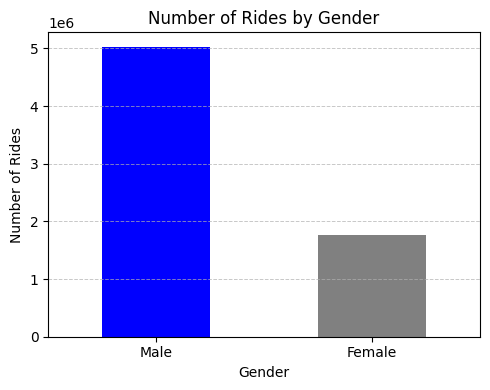

In [10]:

# Count the number of rides per gender
gender_counts = gender_filtered_df['Gender'].value_counts()

# Plot the counts
plt.figure(figsize=(5, 4))
gender_counts.plot(kind='bar', color=['blue', 'gray'])  # Customize colors if needed
plt.title("Number of Rides by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Rides")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)  # Grid only on y-axis

plt.tight_layout()
plt.show()


In [11]:
gender_counts = gender_filtered_df['Gender'].value_counts()
gender_counts

# many more men ride their bikes than woman

Gender
Male      5026431
Female    1760521
Name: count, dtype: int64

In [12]:
birthday_filtered_df = combined_df[combined_df['Birth Year'].notna()]
bgfiltered_df = birthday_filtered_df.replace(gender_mapping)


In [13]:
# Calculate age and replace 'Birth Year' column with it
bgfiltered_df["Birth Year"] = bgfiltered_df["End Time"].str[:4].astype(int) - bgfiltered_df["Birth Year"]

# Rename the column to 'Age'
bgfiltered_df.rename(columns={"Birth Year": "Age"}, inplace=True)

bgfiltered_df.head()


,Start Time,End Time,Start Station Name,End Station Name,Membership,Age,Gender
1010986,2017-10-17 08:44:50,2017-10-17 08:58:51,W 49 St & 8 Ave,Broadway & W 29 St,Subscriber,32.0,Female
1010987,2017-10-17 08:44:47,2017-10-17 08:52:26,Broadway & W 38 St,Broadway & E 22 St,Subscriber,37.0,Male
1010988,2017-10-17 08:44:50,2017-10-17 08:54:03,E 13 St & Avenue A,W 13 St & 5 Ave,Subscriber,38.0,Female
1010989,2017-10-17 08:44:46,2017-10-17 08:50:40,Broadway & W 41 St,Pershing Square South,Subscriber,52.0,Male
1010990,2017-10-17 08:44:50,2017-10-17 08:53:49,1 Ave & E 16 St,W 15 St & 7 Ave,Subscriber,47.0,Female


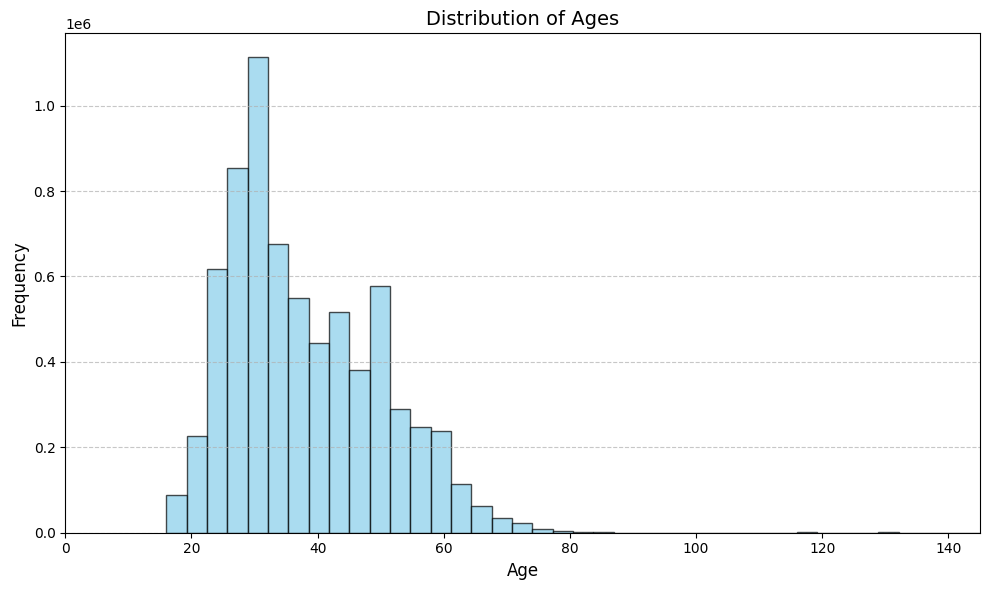

In [14]:
# Plot bar chart
plt.figure(figsize=(10, 6))
plt.hist(bgfiltered_df['Age'], bins=40, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Ages", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim(0, bgfiltered_df['Age'].max())
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [15]:
bgfiltered_df.describe()

,Age
count,7.079653e+06
mean,3.799511e+01
std,1.195998e+01
min,1.600000e+01
25%,2.800000e+01
50%,3.500000e+01
75%,4.700000e+01
max,1.450000e+02


/var/folders/lr/1nb_vllj419bncfmzmb9hkzw0000gn/T/ipykernel_8930/691129939.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = bgfiltered_df.groupby(['Gender', 'Age Group']).size().unstack(fill_value=0)


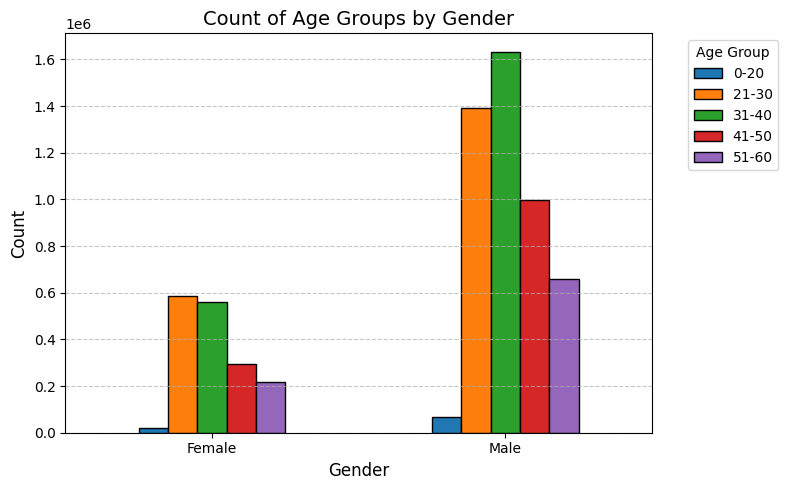

In [16]:

# Define age bins
age_bins = [0, 20, 30, 40, 50, 60]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60']

# Create age groups
bgfiltered_df['Age Group'] = pd.cut(bgfiltered_df['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by Gender and Age Group, then count occurrences
grouped_data = bgfiltered_df.groupby(['Gender', 'Age Group']).size().unstack(fill_value=0)

# Plot grouped bar chart
grouped_data.plot(kind='bar', figsize=(8, 5), edgecolor='black')
plt.title("Count of Age Groups by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [17]:
member_filtered_df = combined_df[combined_df['Membership'].notna()]
# Replace values specifically in the 'Membership' column
member_filtered_df['Membership'] = member_filtered_df['Membership'].replace(
    {"member": "Subscriber", "casual": "Customer"}
)




/var/folders/lr/1nb_vllj419bncfmzmb9hkzw0000gn/T/ipykernel_8930/3805406763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_filtered_df['Membership'] = member_filtered_df['Membership'].replace(


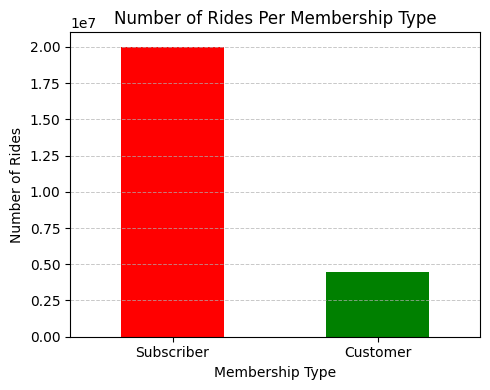

In [18]:

# Count the number of rides per membership type
member_counts = member_filtered_df['Membership'].value_counts()

# Plot the counts
plt.figure(figsize=(5, 4))
member_counts.plot(kind='bar', color=['red', 'green'])  # Customize colors if needed
plt.title("Number of Rides Per Membership Type")
plt.xlabel("Membership Type")
plt.ylabel("Number of Rides")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)  # Grid only on y-axis

plt.tight_layout()
plt.show()


In [19]:
member_filtered_df['Membership'].value_counts()
#overwhelmingly subscribers over customers

Membership
Subscriber    20002695
Customer       4500235
Name: count, dtype: int64

In [26]:
# Convert Start Time and End Time to datetime with format='mixed'
member_filtered_df['Start Time'] = pd.to_datetime(member_filtered_df['Start Time'], format='mixed')
member_filtered_df['End Time'] = pd.to_datetime(member_filtered_df['End Time'], format='mixed')

# Calculate duration in minutes
member_filtered_df['Ride Duration (Minutes)'] = (
    member_filtered_df['End Time'] - member_filtered_df['Start Time']
).dt.total_seconds() / 60

# Inspect the updated DataFrame
member_filtered_df

/var/folders/lr/1nb_vllj419bncfmzmb9hkzw0000gn/T/ipykernel_8930/3086396896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_filtered_df['Start Time'] = pd.to_datetime(member_filtered_df['Start Time'], format='mixed')
/var/folders/lr/1nb_vllj419bncfmzmb9hkzw0000gn/T/ipykernel_8930/3086396896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_filtered_df['End Time'] = pd.to_datetime(member_filtered_df['End Time'], format='mixed')
/var/folders/lr/1nb_vllj419bncfmzmb9hkzw0000gn/T/ipykernel_893

,Start Time,End Time,Start Station Name,End Station Name,Membership,Birth Year,Gender,Ride Duration (Minutes)
0,2021-10-02 09:59:53.075,2021-10-02 10:33:03.696,W 35 St & 9 Ave,Stanton St & Mangin St,Subscriber,NaN,<NA>,33.177017
1,2021-10-12 21:39:37.664,2021-10-12 21:52:36.906,W 15 St & 7 Ave,E 11 St & 3 Ave,Subscriber,NaN,<NA>,12.987367
2,2021-10-16 19:46:28.492,2021-10-16 19:57:41.632,W 15 St & 7 Ave,E 33 St & 5 Ave,Subscriber,NaN,<NA>,11.219000
3,2021-10-16 15:34:08.327,2021-10-16 16:01:54.661,E 11 St & 3 Ave,Hanson Pl & Ashland Pl,Customer,NaN,<NA>,27.772233
4,2021-10-15 22:22:41.993,2021-10-15 22:39:16.166,9 Ave & W 22 St,W 35 St & 9 Ave,Customer,NaN,<NA>,16.569550
...,...,...,...,...,...,...,...,...
24520874,2020-10-08 16:35:33.874,2020-10-08 16:51:11.183,E 48 St & 5 Ave,E 16 St & 5 Ave,Customer,NaN,<NA>,15.621817
24520875,2020-10-09 14:44:19.235,2020-10-09 15:14:14.612,Morris Ave & E 142 St,Lincoln Ave & E 138 St,Customer,NaN,<NA>,29.922950
24520876,2020-10-12 13:54:42.685,2020-10-12 14:01:33.329,W 24 St & 7 Ave,E 16 St & 5 Ave,Subscriber,NaN,<NA>,6.844067
24520877,2020-10-28 23:08:46.574,2020-10-28 23:18:31.511,W 24 St & 7 Ave,1 Ave & E 39 St,Subscriber,NaN,<NA>,9.748950


In [30]:
grouped_data = member_filtered_df.groupby('Membership')['Ride Duration (Minutes)'].mean()
grouped_data

#customers take a ride for 24 more minutes per ride in comparison to subscribers 
#lets find the average times they ride now

Membership
Customer      38.342793
Subscriber    14.219341
Name: Ride Duration (Minutes), dtype: float64

/var/folders/lr/1nb_vllj419bncfmzmb9hkzw0000gn/T/ipykernel_8930/2727232991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_filtered_df['Start Time'] = pd.to_datetime(member_filtered_df['Start Time'], format='mixed')
/var/folders/lr/1nb_vllj419bncfmzmb9hkzw0000gn/T/ipykernel_8930/2727232991.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_filtered_df['Hour'] = member_filtered_df['Start Time'].dt.hour


<Figure size 1200x600 with 0 Axes>

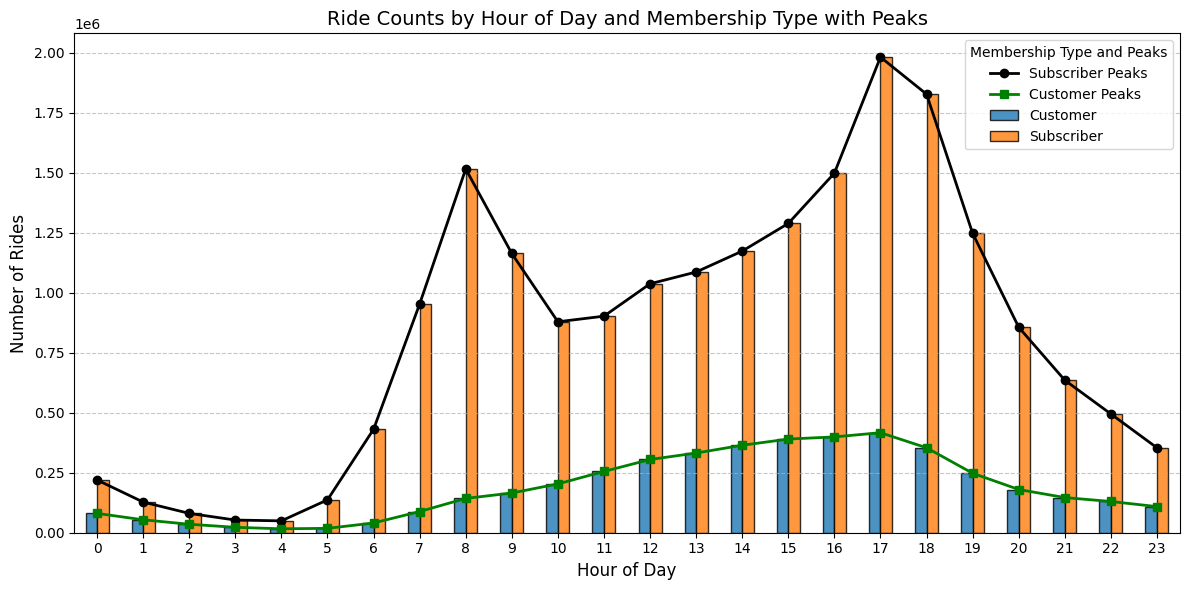

In [42]:

# Convert Start Time to datetime
member_filtered_df['Start Time'] = pd.to_datetime(member_filtered_df['Start Time'], format='mixed')

# Extract the hour of the day
member_filtered_df['Hour'] = member_filtered_df['Start Time'].dt.hour

# Group by Membership and Hour, count the number of rides
hourly_counts = member_filtered_df.groupby(['Membership', 'Hour']).size().unstack(fill_value=0)

# Calculate the peak (max) for each membership type
subscriber_peaks = hourly_counts.loc['Subscriber']
customer_peaks = hourly_counts.loc['Customer']

# Plot the grouped bar chart
plt.figure(figsize=(12, 6))
hourly_counts.T.plot(kind='bar', figsize=(12, 6), edgecolor='black', alpha=0.8)

# Add the lines tracing the peaks
plt.plot(subscriber_peaks.index, subscriber_peaks.values, marker='o', color='black', label='Subscriber Peaks', linewidth=2)
plt.plot(customer_peaks.index, customer_peaks.values, marker='s', color='green', label='Customer Peaks', linewidth=2)

# Add titles and labels
plt.title("Ride Counts by Hour of Day and Membership Type with Peaks", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Membership Type and Peaks", fontsize=10)

plt.tight_layout()
plt.show()


For subscribers, they take rides most frequently during commuter hours (8-10am) and (5-7pm) whereas customers tend to peak in the afternoons. 

/var/folders/lr/1nb_vllj419bncfmzmb9hkzw0000gn/T/ipykernel_8930/3237164153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_filtered_df['Start Time'] = pd.to_datetime(member_filtered_df['Start Time'])
/var/folders/lr/1nb_vllj419bncfmzmb9hkzw0000gn/T/ipykernel_8930/3237164153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_filtered_df['Year'] = member_filtered_df['Start Time'].dt.year


<Figure size 1000x600 with 0 Axes>

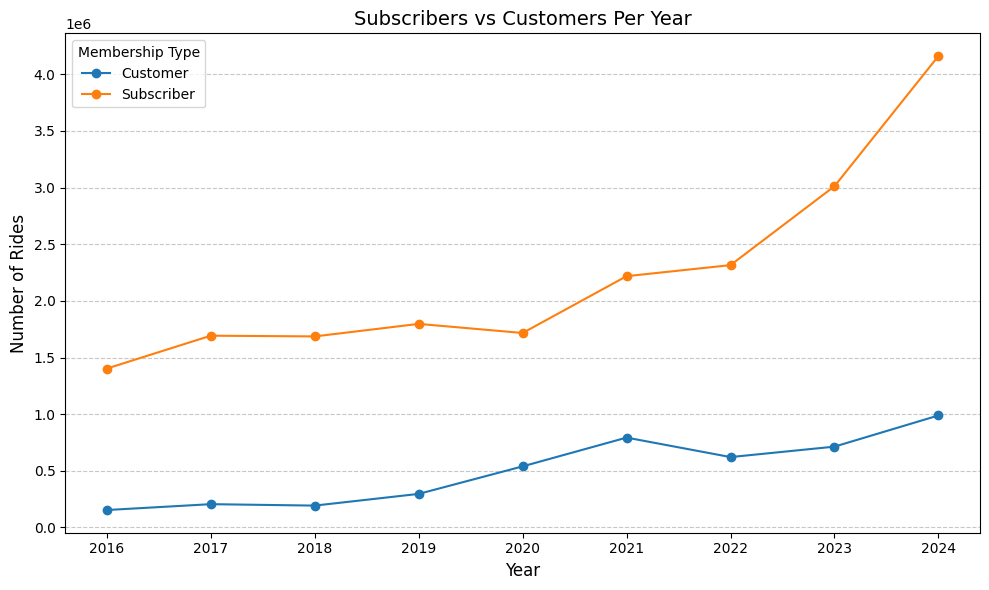

In [45]:

# Convert Start Time to datetime
member_filtered_df['Start Time'] = pd.to_datetime(member_filtered_df['Start Time'])

# Extract the year
member_filtered_df['Year'] = member_filtered_df['Start Time'].dt.year

# Group by Year and Membership, and count occurrences
yearly_counts = member_filtered_df.groupby(['Year', 'Membership']).size().unstack(fill_value=0)

# Plot the trends
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Subscribers vs Customers Per Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Membership Type", fontsize=10)
plt.tight_layout()
plt.show()
